In [4]:
###########################################################
# 데이터 전처리
###########################################################
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale=1./255)  # 모든 이미지를 1/255로 스케일을 조정합니다
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "./dataset/new_train_samples/train"
validation_dir = './dataset/new_train_samples/validation'

batch_size = 32
# batch_size = 64


train_generator = train_datagen.flow_from_directory( \
        train_dir,                  # 타깃 디렉터리
        target_size=(224, 224),     # 모든 이미지를 224 × 224 크기
        batch_size=batch_size,
        class_mode='binary')        #

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')

Found 613 images belonging to 2 classes.
Found 167 images belonging to 2 classes.


배치 데이터 크기: (32, 224, 224, 3)
배치 레이블 크기: (32,)


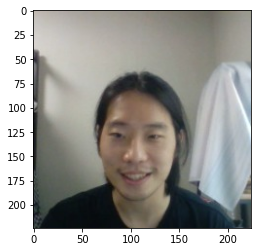

In [5]:
"제너레이터의 출력:  150 × 150  RGB "
"이미지의 배치((20, 150, 150, 3) 크기)와 이진 레이블의 배치((20,) 크기)  "
"각 배치에는 20개의 샘플(배치 크기)  "

for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)  #(20, 150, 150, 3)
    print('배치 레이블 크기:', labels_batch.shape) #(20,)
    break

import matplotlib.pyplot as plt
plt.imshow(  train_generator[0][0][0] )
plt.show()

In [6]:
###########################################################
# 학습
###########################################################
from model_vgg import mkmodel
from tensorflow.keras.models import load_model
import tensorflow as tf

model =  mkmodel()
print("aa")
model.summary()

aa
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 256)   

D:\Program Files\python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [7]:
import os 
if os.path.exists("./tn_model/t_vgg_model") :
    model = load_model("./tn_model/t_vgg_model")  

checkpoint_path = "./tn_model/t_vgg_model.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 모델의 가중치를 저장하는 콜백 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
steps_per_epochs = 20 # 학습데이터의 총 개수 / 배치 사이즈 (소수점 올림)
epochs = 50


In [12]:
history = model.fit(
      train_generator ,
      steps_per_epoch=steps_per_epochs  ,
      epochs=epochs ,
      validation_data=validation_generator,
      validation_steps=6,
      callbacks=[cp_callback])

Epoch 1/50


ResourceExhaustedError:  OOM when allocating tensor with shape[32,128,112,112] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node sequential_1/conv2d_16/Relu (defined at C:\Users\marbi\AppData\Local\Temp/ipykernel_31096/1421951820.py:1) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_2219]

Function call stack:
train_function


In [ ]:
model.save("./tn_model/t_gray_model.h5") 

In [ ]:
###########################################################
# 학습 결과 정확도 및 비용 그래프
###########################################################
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
########################################################
import matplotlib.pyplot as plt 
print( model.predict( train_generator[10][0][0].reshape(-1,150,150,3) ))
plt.imshow(  train_generator[10][0][0]  )
plt.show()

In [ ]:
from tensorflow.keras.models import load_model    #학습된 모델 로드

model = load_model("./tn_model/t_model.h5")

model.summary()

In [ ]:
from tensorflow import keras
model = keras.models.load_model("./tn_model/t_model.h5", compile=False)

export_path = './tn_model/'
model.save(export_path, save_format='tf')

In [ ]:
import tensorflow as tf
from tensorflow.python.tools import freeze_graph
def main():
    freeze_graph.freeze_graph('./tn_model/tn_graph.pbtxt', "", False, './tn_model/t_model.ckpt', 
    'output_node_name', "save/restore_all", "save/Const", 'frozen.pb', True, "") 
    print('done.')
if __name__ == '__main__':
    main()